<h2 style = "text-align: center; font-size: 40px;">MOVIE RATING PREDICTION WITH PYTHON<h2>



<h3>Introduction</h3>
<p>Movies are unquestionably integral to modern society, each conveying a unique narrative, idea, or argument. The dataset we're working with comprises Indian movies available on IMDb.com. Our objective is to meticulously clean this data through various methods and offer valuable insights into its partitioning, while also examining the correlations between different features. This process will be structured into a Data Preprocessing Pipeline, which will be elaborated on in subsequent discussions.</p

<h2>Explanation of Data</h2>

<table style="    width: 70%;
    border-collapse: collapse;
    margin: 20px auto;">
  <tr>
    <td><strong>Name:</strong></td>
    <td>The name of the film.</td>
  </tr>
  <tr>
    <td><strong>Year:</strong></td>
    <td>The year of the film's release.</td>
  </tr>
  <tr>
    <td><strong>Duration:</strong></td>
    <td>The duration of the film in minutes.</td>
  </tr>
  <tr>
    <td><strong>Genre:</strong></td>
    <td>The genre of the film.</td>
  </tr>
  <tr>
    <td><strong>Rating:</strong></td>
    <td>The rating assigned to the film.</td>
  </tr>
  <tr>
    <td><strong>Votes:</strong></td>
    <td>The number of votes or evaluations received by the film.</td>
  </tr>
  <tr>
    <td><strong>Director:</strong></td>
    <td>The director of the film.</td>
  </tr>
  <tr>
    <td><strong>Actors:</strong></td>
    <td>Actor 1, Actor 2, and Actor 3: The three main actors of the film.</td>
  </tr>
</table>

<h3>Importing of biobliotics</h3>

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
dataset = "IMDb Movies India.csv"
data = pd.read_csv(dataset, encoding='latin-1')

# Data exploration

In [2]:
data.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [3]:
data.describe(include=['O'])

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7920,14984,13892,13125,12365
unique,13838,102,182,485,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,227,58,158,83,91


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 615.4+ KB


<h2>Data Preprocessing</h2>

In [116]:
data.isnull().sum().any()

False

In [6]:
data.isnull()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,False,True,True,False,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15504,False,False,True,False,False,False,False,False,False,False
15505,False,False,False,False,False,False,False,False,False,False
15506,False,False,True,False,True,True,False,False,True,True
15507,False,False,True,False,True,True,True,True,True,True


In [7]:
data.isnull().sum().any()

True

## Delete missing value

In [114]:
data.dropna(axis=0, inplace=True)

In [115]:
data.isnull().any()

Name        False
Year        False
Duration    False
Genre       False
Rating      False
Votes       False
Director    False
Actor 1     False
Actor 2     False
Actor 3     False
dtype: bool

In [10]:
data.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

## Checking duplicate values


In [60]:
duplicate_rows = data[data.duplicated()]
print("Lignes dupliquées :\n", duplicate_rows)

Lignes dupliquées :
 Empty DataFrame
Columns: [Name, Year, Duration, Genre, Rating, Votes, Director, Actor 1, Actor 2, Actor 3]
Index: []


## Encoding Data

In [61]:
from sklearn.preprocessing import LabelEncoder
data_encoded = data.copy()
label_encoder = LabelEncoder()
for col in data_encoded.columns:
    if data_encoded[col].dtype == 'object':
        data_encoded[col] = label_encoder.fit_transform(data_encoded[col])
print(data_encoded.head())

   Name  Year  Duration  Genre  Rating  Votes  Director  Actor 1  Actor 2  \
1     0    88         9    229     7.0   1843       629     1352     2272   
3     1    88        10    184     4.4   1164      1335     1198      719   
5     3    66        47    157     4.7   1892      1530      378       75   
6     4    74        42    289     7.4     34      2044      692     1112   
8    76    81       156    320     5.6   1133       135     1934     1175   

   Actor 3  
1      319  
3     2148  
5     2045  
6     2524  
8     1013  


In [123]:
data_encoded = pd.DataFrame(data_encoded)
data_encoded

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,88,9,229,7.0,1843,629,1352,2272,319
3,88,10,184,4.4,1164,1335,1198,719,2148
5,66,47,157,4.7,1892,1530,378,75,2045
6,74,42,289,7.4,34,2044,692,1112,2524
8,81,156,320,5.6,1133,135,1934,1175,1013
...,...,...,...,...,...,...,...,...,...
15493,84,15,229,6.1,1312,1223,1861,1801,1615
15494,70,53,133,6.2,178,2059,763,1619,1184
15503,58,25,28,5.8,1348,1793,406,754,1685
15505,68,29,38,4.5,1681,1025,112,2164,314


## Visualisation

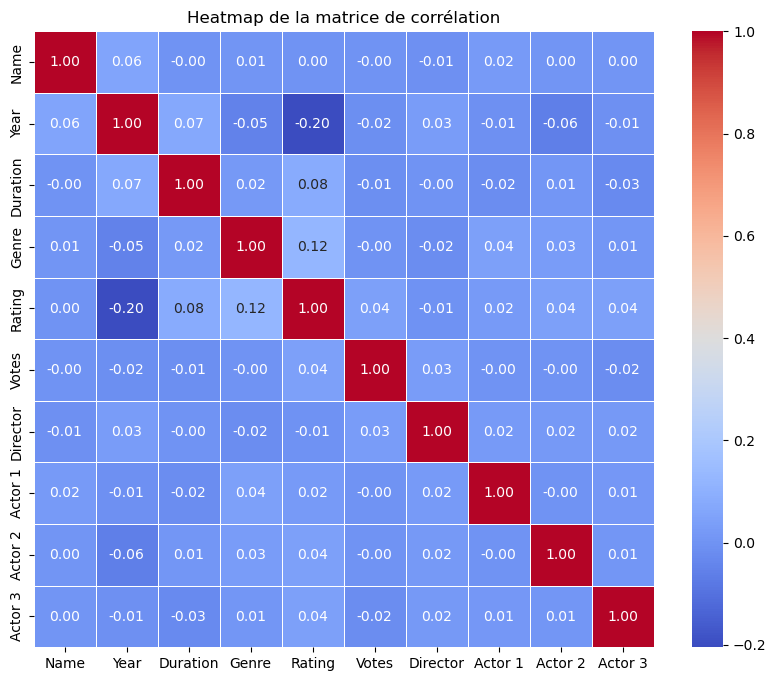

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculer la matrice de corrélation
corr_matrix = data_encoded.corr()
# Créer un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap de la matrice de corrélation')
plt.show()

## Correlation between name and the target variable rating

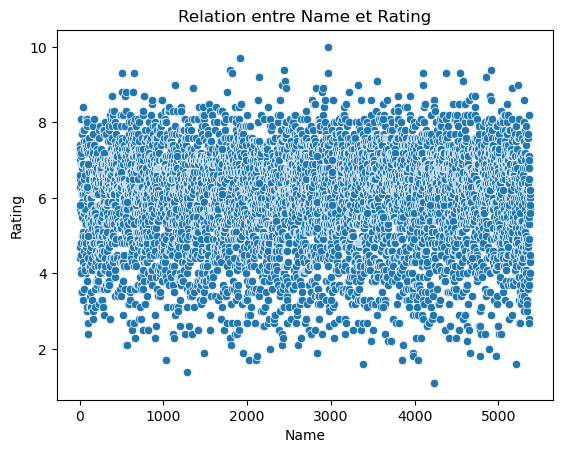

Coefficient de corrélation entre Name et Rating: 0.0787611305591658


In [72]:
import seaborn as sns

sns.scatterplot(x='Name', y='Rating', data=data_encoded)
plt.xlabel('Name')
plt.ylabel('Rating')
plt.title('Relation entre Name et Rating')
plt.show()
correlation = data_encoded['Duration'].corr(data_encoded['Rating'])

print("Coefficient de corrélation entre Name et Rating:", correlation)


## Correlation between Genre and the target variable rating

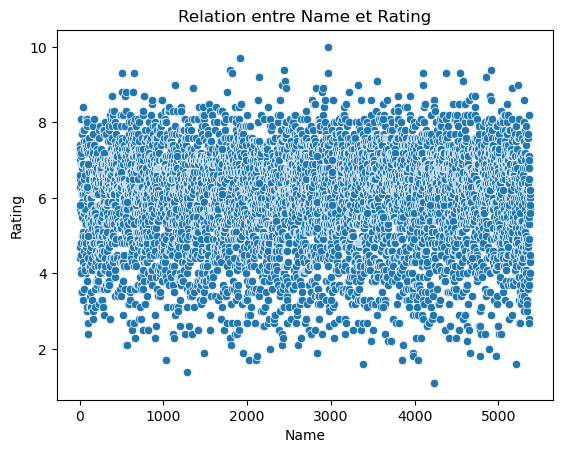

Coefficient de corrélation entre Genre et Rating: 0.0007687535947228321


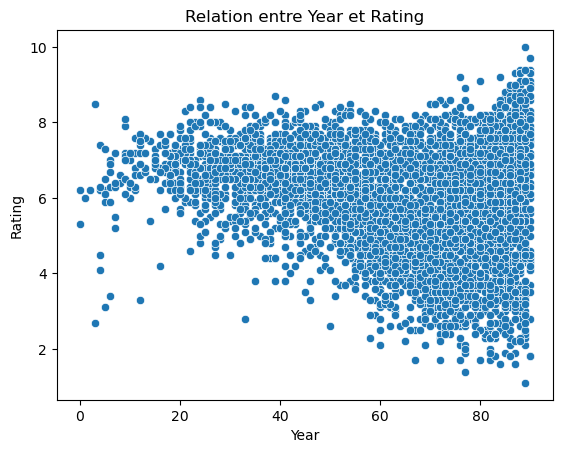

Coefficient de corrélation entre Genre et Rating: -0.20464236527195104


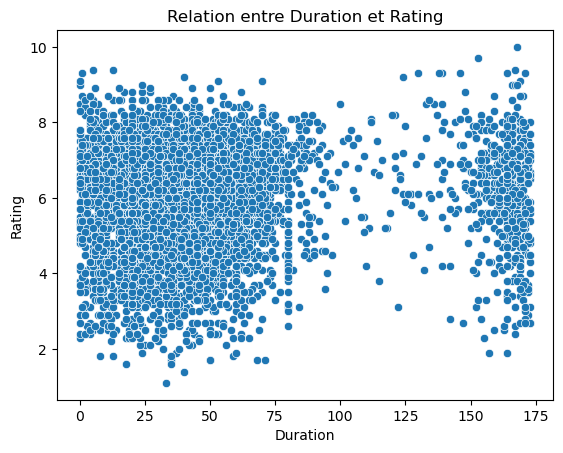

Coefficient de corrélation entre Genre et Rating: 0.0787611305591658


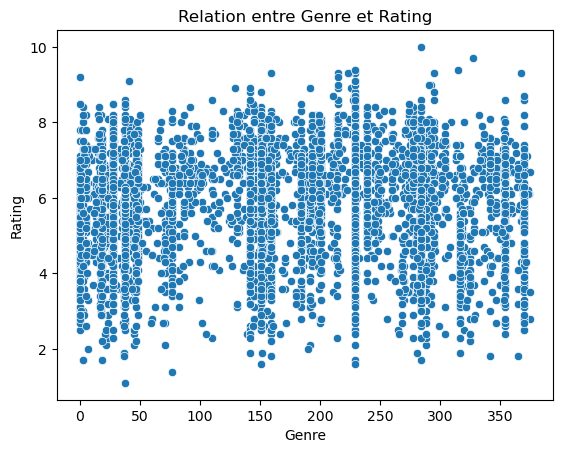

Coefficient de corrélation entre Genre et Rating: 0.12179589934886431


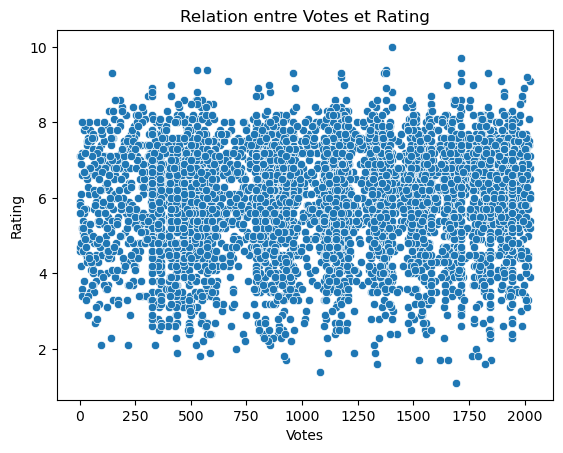

Coefficient de corrélation entre Genre et Rating: 0.041838900070684686


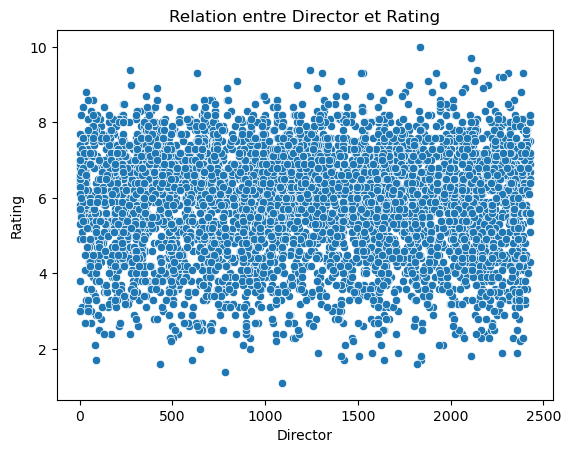

Coefficient de corrélation entre Genre et Rating: -0.006824356300656594


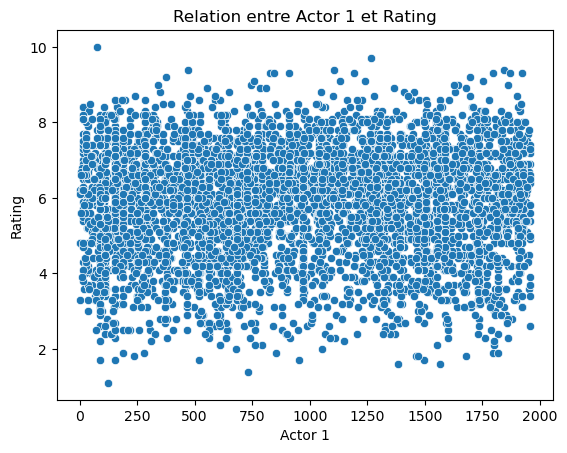

Coefficient de corrélation entre Genre et Rating: 0.02342990371921981


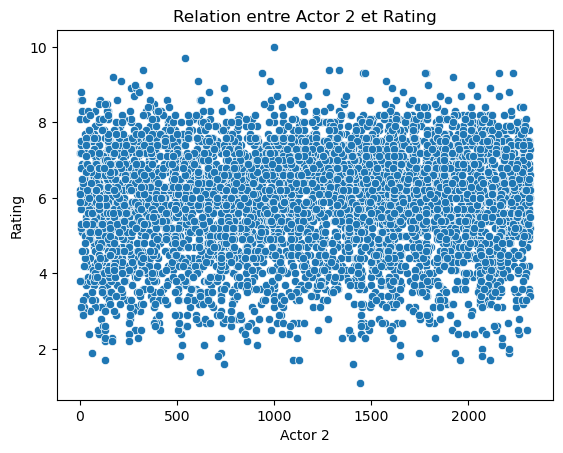

Coefficient de corrélation entre Genre et Rating: 0.04135283602511746


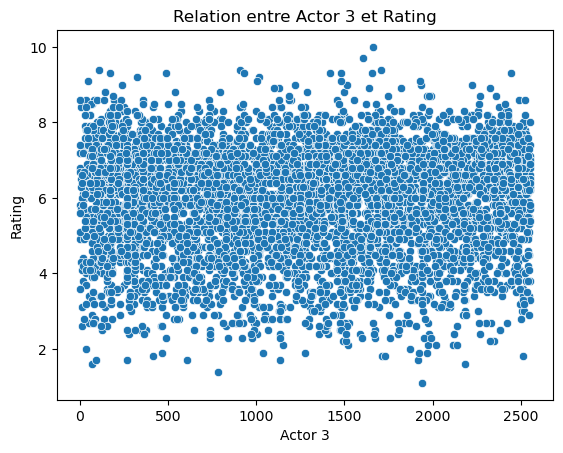

Coefficient de corrélation entre Genre et Rating: 0.04241333112264042


In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
data_selected = data_encoded.drop(columns=['Rating'])
for feature in data_selected.columns:
    sns.scatterplot(x=feature, y='Rating', data=data_encoded)
    plt.xlabel(feature)
    plt.ylabel('Rating')
    plt.title(f'Relation entre {feature} et Rating')
    plt.show()
    correlation = data_encoded[feature].corr(data_encoded['Rating'])
    print("Coefficient de corrélation entre Genre et Rating:", correlation)

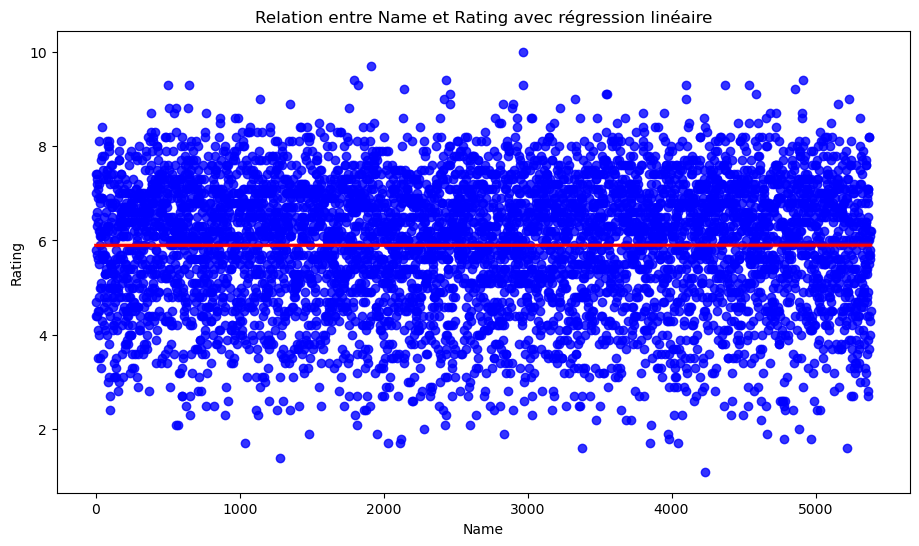

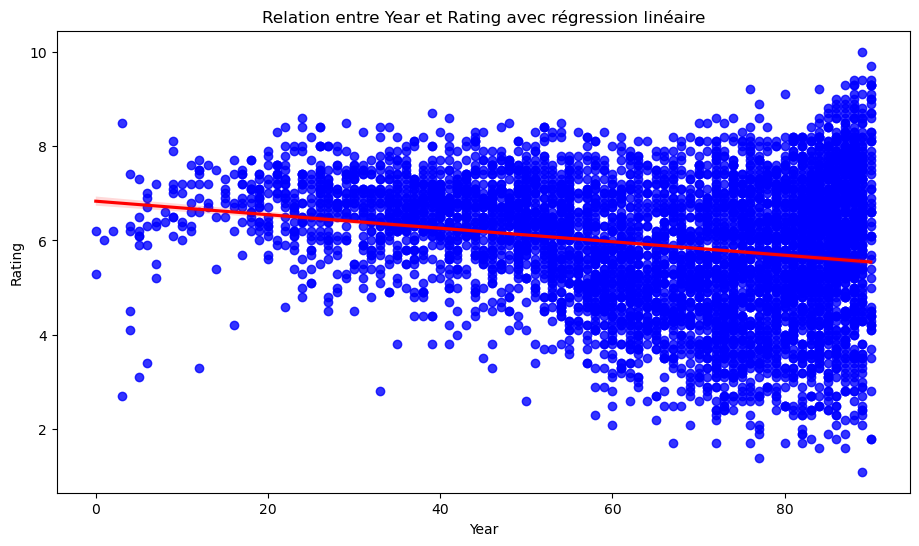

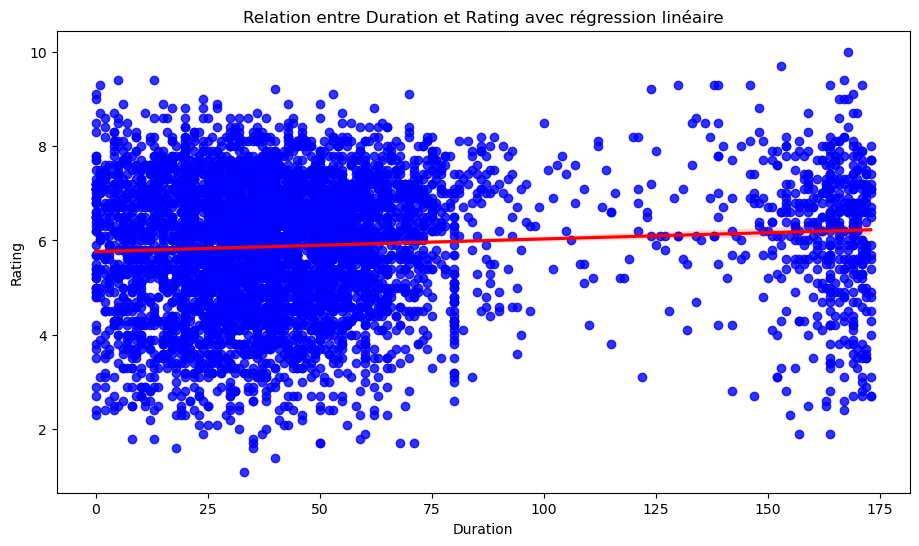

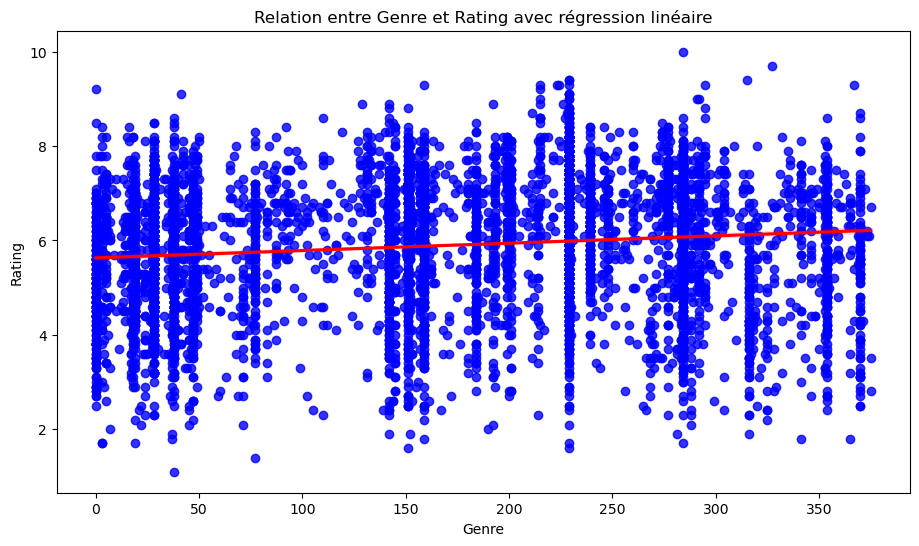

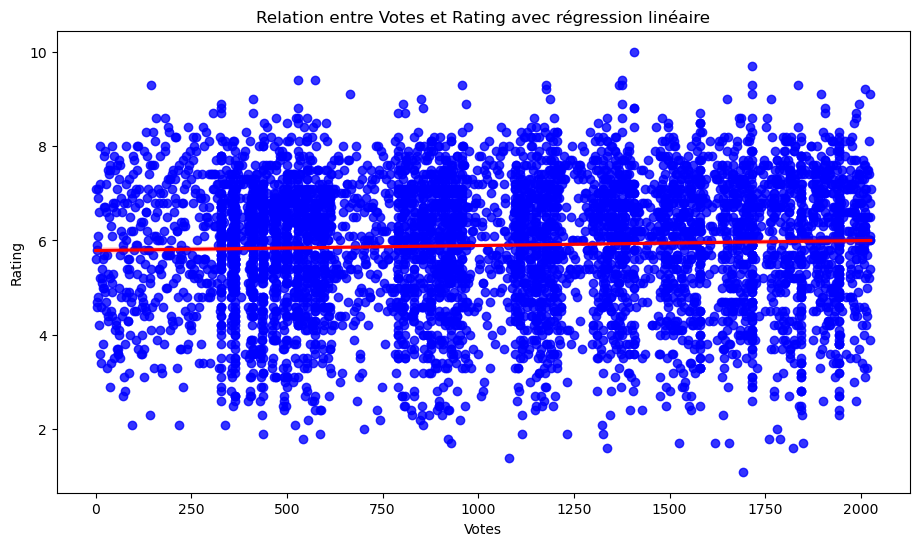

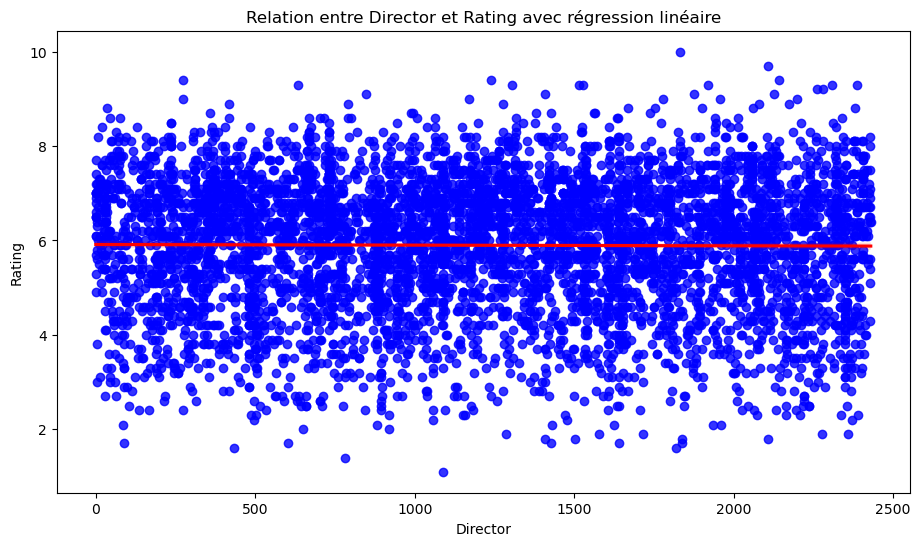

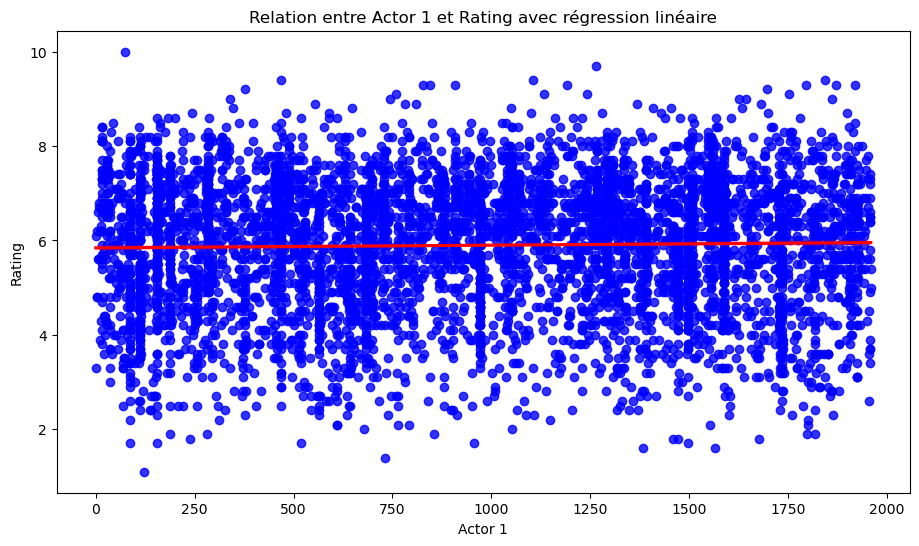

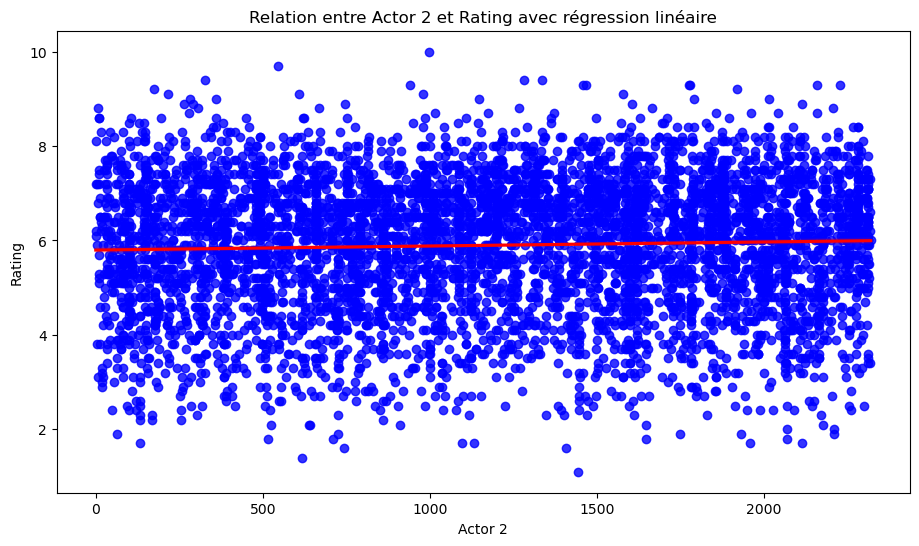

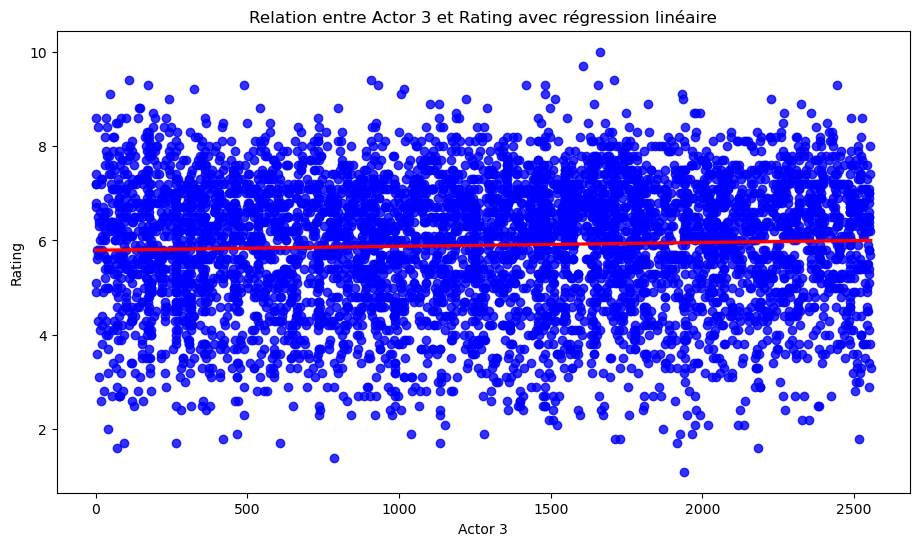

In [103]:
for feature in data_selected.columns:
    plt.figure(figsize=(11, 6))
    sns.regplot(x=feature, y='Rating', data=data_encoded ,  color='Blue',line_kws={'color': 'red'})
    plt.xlabel(feature)
    plt.ylabel('Rating')
    plt.title(f'Relation entre {feature} et Rating avec régression linéaire')
    plt.show()

In [121]:
data_encoded['Genre'].head(10)

1     229
3     184
5     157
6     289
8     320
9      37
10    229
11    316
12    323
13    159
Name: Genre, dtype: int32

In [122]:
data_encoded

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,88,9,229,7.0,1843,629,1352,2272,319
3,88,10,184,4.4,1164,1335,1198,719,2148
5,66,47,157,4.7,1892,1530,378,75,2045
6,74,42,289,7.4,34,2044,692,1112,2524
8,81,156,320,5.6,1133,135,1934,1175,1013
...,...,...,...,...,...,...,...,...,...
15493,84,15,229,6.1,1312,1223,1861,1801,1615
15494,70,53,133,6.2,178,2059,763,1619,1184
15503,58,25,28,5.8,1348,1793,406,754,1685
15505,68,29,38,4.5,1681,1025,112,2164,314


In [126]:
X = data_encoded.drop('Rating', axis=1)  # Sélection des caractéristiques explicatives, en supprimant la colonne 'Rating'
Y = data_encoded['Rating']  # Sélection de la variable cible 'Rating'

1        7.0
3        4.4
5        4.7
6        7.4
8        5.6
        ... 
15493    6.1
15494    6.2
15503    5.8
15505    4.5
15508    6.2
Name: Rating, Length: 5659, dtype: float64

## Splitting the dataset into training and test set

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2,random_state=42)

## Model training

In [128]:
from sklearn.linear_model import LinearRegression
# Créer une instance du modèle
model = LinearRegression()
# Entraîner le modèle
model.fit(X_train, Y_train)
# Faire des prédictions sur les données de test
predictions = model.predict(X_test)


In [130]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculer MSE
mse = mean_squared_error(Y_test, predictions)
print("Mean Squared Error (MSE):", mse)

# Calculer MAE
mae = mean_absolute_error(Y_test, predictions)
print("Mean Absolute Error (MAE):", mae)

# Calculer R²
r_squared = r2_score(Y_test, predictions)
print("R-squared (R²):", r_squared)

# Calculer RMSE
rmse = mean_squared_error(Y_test, predictions, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 1.7221654323967428
Mean Absolute Error (MAE): 1.057469056619566
R-squared (R²): 0.06997632420943489
Root Mean Squared Error (RMSE): 1.3123130085451196


In [132]:
from IPython.display import HTML

# Définition des informations sur les mesures de performance
mse_info = "L'erreur quadratique moyenne représente la moyenne des carrés des différences entre les valeurs prédites par le modèle et les valeurs réelles. Une MSE de 1.72 indique en moyenne une différence de 1.72 unités au carré entre les prédictions et les valeurs réelles. Une valeur plus faible de MSE indique des prédictions plus précises."

mae_info = "L'erreur absolue moyenne est la moyenne des valeurs absolues des différences entre les valeurs prédites et les valeurs réelles. Une MAE de 1.06 indique une erreur absolue moyenne de 1.06 unités entre les prédictions et les valeurs réelles."

r_squared_info = "Le coefficient de détermination R² mesure la proportion de la variance de la variable cible qui est expliquée par le modèle. Un R² de 0.07 signifie que seulement 7% de la variance de la variable cible est expliquée par le modèle. Un R² plus élevé indique une meilleure capacité du modèle à expliquer la variance des données."

rmse_info = "La racine carrée de l'erreur quadratique moyenne est simplement la racine carrée de la MSE. Une RMSE de 1.31 indique que l'erreur moyenne absolue entre les prédictions et les valeurs réelles est d'environ 1.31 unités."

# Génération du contenu HTML
html_content = f"""
<h1>Performance du Modèle</h1>
<h2>Mean Squared Error (MSE)</h2>
<p>{mse_info}</p>

<h2>Mean Absolute Error (MAE)</h2>
<p>{mae_info}</p>

<h2>R-squared (R²)</h2>
<p>{r_squared_info}</p>

<h2>Root Mean Squared Error (RMSE)</h2>
<p>{rmse_info}</p>
"""

# Affichage du contenu HTML dans la cellule de sorxtie
HTML(html_content)


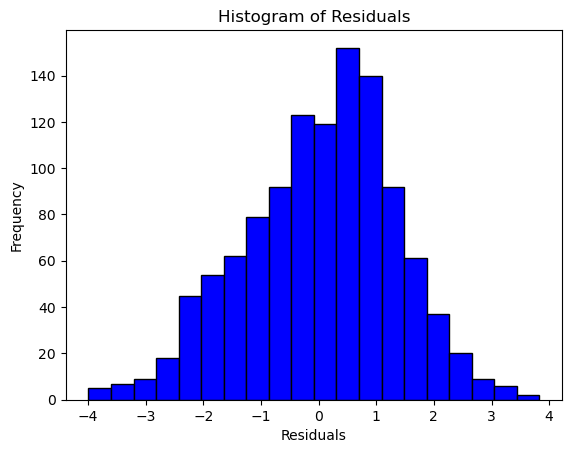

In [136]:
# Calculer les résidus
residuals = Y_test - predictions

# Tracer l'histogramme des résidus
plt.hist(residuals, bins=20, color='blue', edgecolor='black')

plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
